#  Exploratory Data Analysis on Global Terrorism

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [2]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding="ISO-8859-1")
data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,197503270005,1975,3,27,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,0.0,1.0,NaN
2905,197503270006,1975,3,27,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,0.0,1.0,NaN
2906,197503270007,1975,3,27,NaN,0,NaN,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
2907,197503270008,1975,3,27,NaN,0,NaN,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,1.0,1.0,1.0,1.0,NaN


# Data Preprocessing

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [4]:
print(data.shape)
print(len(data))

(2909, 135)
2909


In [5]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Columns: 135 entries, eventid to related
dtypes: float64(62), int64(22), object(51)
memory usage: 3.0+ MB


In [7]:
data.isnull().sum()

eventid          0
iyear            0
imonth           0
iday             0
approxdate    2893
              ... 
INT_LOG          1
INT_IDEO         1
INT_MISC         1
INT_ANY          1
related       2649
Length: 135, dtype: int64

In [53]:
df = data.groupby(['country_txt', 'city'])
df.first()

eventid  iyear  imonth  iday approxdate  extended  \
country_txt city                                                               
Afghanistan Kabul     197305010002   1973       5     1       None         0   
Algeria     Algiers   197210060001   1972      10     6       None         0   
Andorra     Unknown   197407140002   1974       7    14       None         0   
Argentina   Acheral   197405310003   1974       5    31       None         0   
            Atucha    197303260001   1973       3    26       None         0   
...                            ...    ...     ...   ...        ...       ...   
Yugoslavia  Belgrade  197308040001   1973       8     4       None         0   
            Skopje    197406240004   1974       6    24       None         0   
Zaire       Kinshasa  197209210002   1972       9    21       None         0   
Zambia      Lusaka    197309110001   1973       9    11       None         0   
            Unknown   197101150001   1971       1    15       None         0   

                     resolution  country  region                  region_txt  \
country_txt city                                                               
Afghanistan Kabul          None        4       6                  South Asia   
Algeria     Algiers        None        6      10  Middle East & North Africa   
Andorra     Unknown        None        7       8              Western Europe   
Argentina   Acheral        None       11       3               South America   
            Atucha         None       11       3               South America   
...                         ...      ...     ...                         ...   
Yugoslavia  Belgrade       None      235       9              Eastern Europe   
            Skopje         None      235       9              Eastern Europe   
Zaire       Kinshasa       None      604      11          Sub-Saharan Africa   
Zambia      Lusaka         None      230      11          Sub-Saharan Africa   
            Unknown        None      230      11          Sub-Saharan Africa   

                      ... addnotes  \
country_txt city      ...            
Afghanistan Kabul     ...     None   
Algeria     Algiers   ...     None   
Andorra     Unknown   ...     None   
Argentina   Acheral   ...     None   
            Atucha    ...     None   
...                   ...      ...   
Yugoslavia  Belgrade  ...     None   
            Skopje    ...     None   
Zaire       Kinshasa  ...     None   
Zambia      Lusaka    ...     None   
            Unknown   ...     None   

                                                                 scite1  \
country_txt city                                                          
Afghanistan Kabul                                                  None   
Algeria     Algiers                                                None   
Andorra     Unknown                                                None   
Argentina   Acheral                                                None   
            Atucha                                                 None   
...                                                                 ...   
Yugoslavia  Belgrade                                               None   
            Skopje                                                 None   
Zaire       Kinshasa  http://news.bbc.co.uk/onthisday/hi/dates/stori...   
Zambia      Lusaka                                                 None   
            Unknown                                                None   

                                                                 scite2  \
country_txt city                                                          
Afghanistan Kabul                                                  None   
Algeria     Algiers                                                None   
Andorra     Unknown                                                None   
Argentina   Acheral                                                None   
            Atucha      

In [54]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
eventid,2909.0,1.972186e+11,1.584058e+08,1.970000e+11,1.971022e+11,1.972083e+11,1.974011e+11,1.975033e+11
iyear,2909.0,1.972123e+03,1.585828e+00,1.970000e+03,1.971000e+03,1.972000e+03,1.974000e+03,1.975000e+03
imonth,2909.0,6.138536e+00,3.421309e+00,0.000000e+00,3.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
iday,2909.0,1.538261e+01,9.095383e+00,0.000000e+00,7.000000e+00,1.600000e+01,2.300000e+01,3.100000e+01
extended,2909.0,3.231351e-02,1.768618e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...
nreleased,115.0,9.852174e+00,3.517556e+01,-9.900000e+01,1.000000e+00,1.000000e+00,1.500000e+00,1.870000e+02
INT_LOG,2908.0,-3.232462e+00,4.454597e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
INT_IDEO,2908.0,-3.148900e+00,4.530162e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
INT_MISC,2908.0,5.275103e-01,6.826765e-01,-9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# EDA & Data Visualization

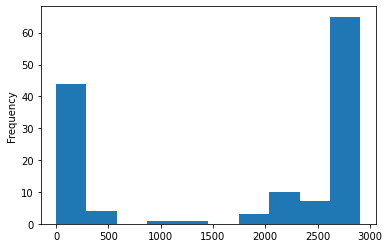

In [18]:
data.isnull().sum().plot.hist()

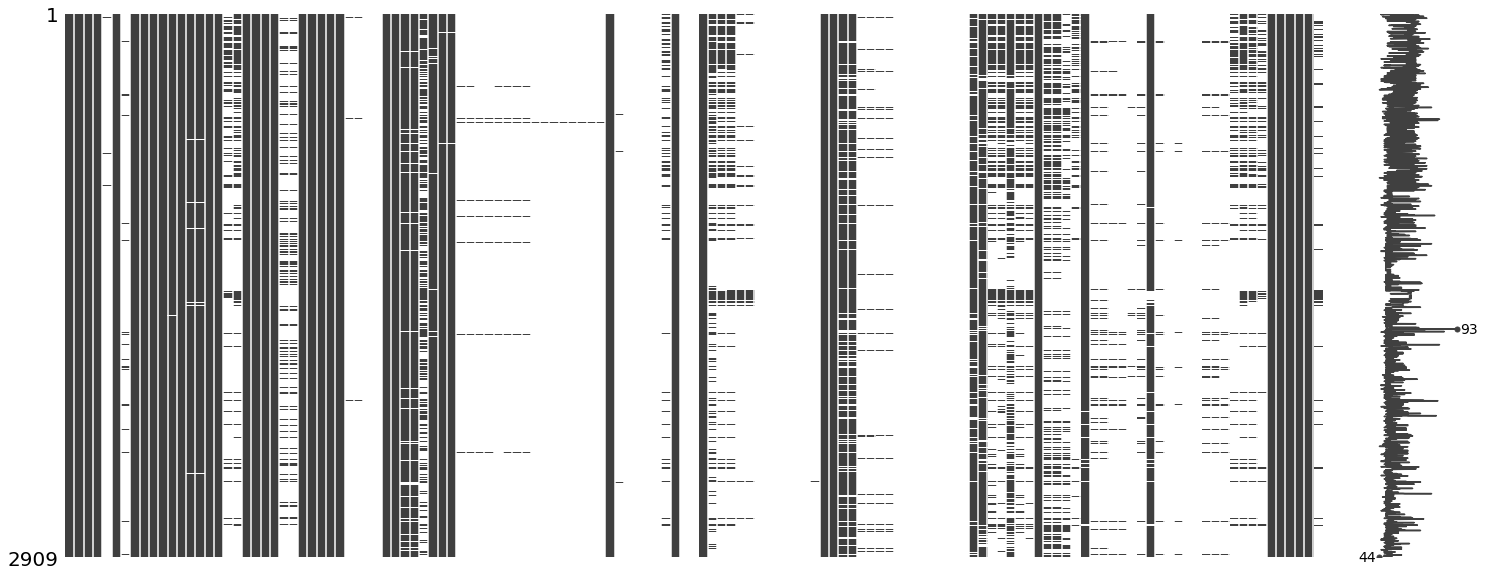

In [19]:
import missingno as msno
msno.matrix(data)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


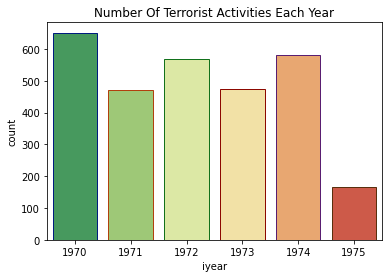

In [20]:
sns.countplot('iyear', data = data, palette='RdYlGn_r', edgecolor = sns.color_palette('dark',10))
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


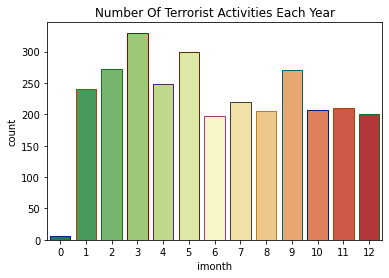

In [22]:
sns.countplot('imonth', data = data, palette='RdYlGn_r', edgecolor = sns.color_palette('dark',10))
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

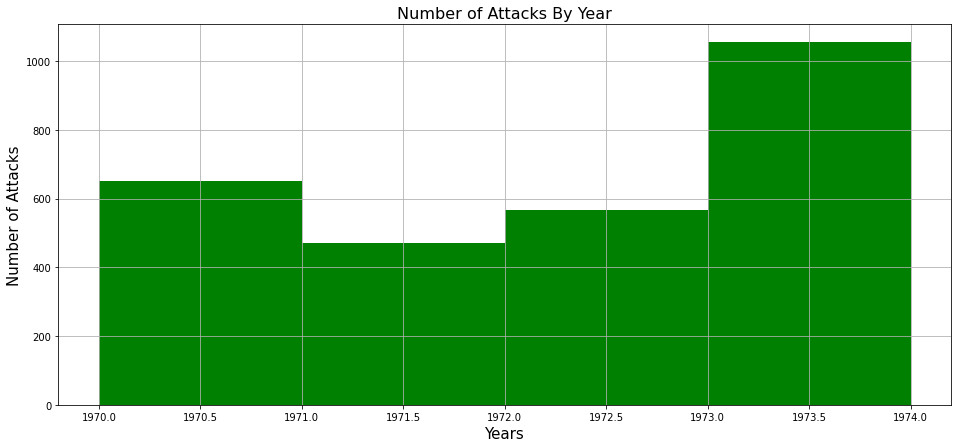

In [21]:
data.iyear.plot(kind = 'hist', color = 'g', bins = range(1970, 1975), figsize = (16,7),grid=True)
plt.xlabel("Years", fontsize=15)
plt.ylabel("Number of Attacks", fontsize=15)
plt.title("Number of Attacks By Year", fontsize=16)
plt.show()

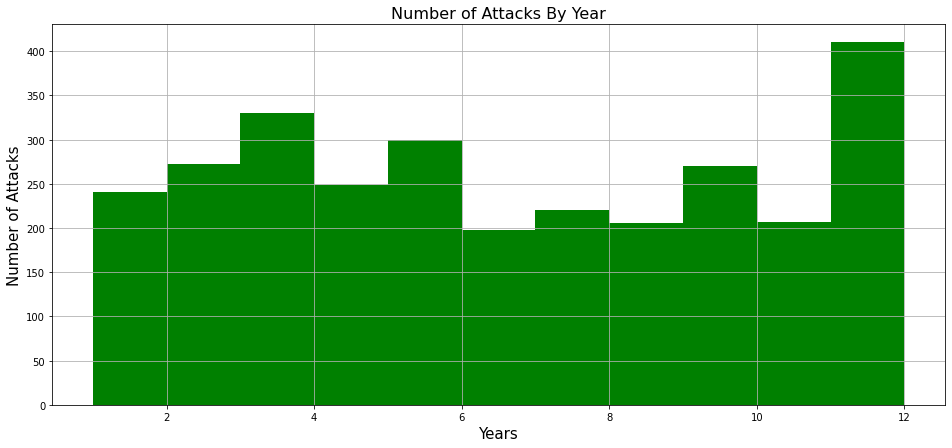

In [24]:
data.imonth.plot(kind = 'hist', color = 'g', bins = range(1, 13), figsize = (16,7),grid=True)
plt.xlabel("Years", fontsize=15)
plt.ylabel("Number of Attacks", fontsize=15)
plt.title("Number of Attacks By Year", fontsize=16)
plt.show()

In [25]:
attacks_in_region = data.region.value_counts().to_frame().reset_index() 
attacks_in_region

,index,region
0,8,1243
1,1,1004
2,3,305
3,10,213
4,5,37
5,2,32
6,11,24
7,9,21
8,12,12
9,4,10


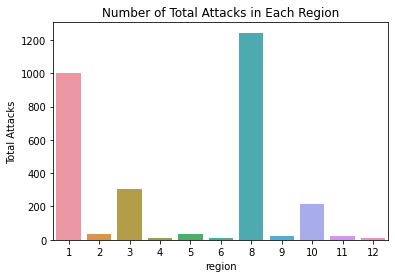

In [28]:
attacks_in_region = data.region.value_counts().to_frame().reset_index() 
attacks_in_region.columns = ['region', 'Total Attacks']

sns.barplot(x = attacks_in_region.region, y = attacks_in_region['Total Attacks'])
plt.title('Number of Total Attacks in Each Region')
plt.show()

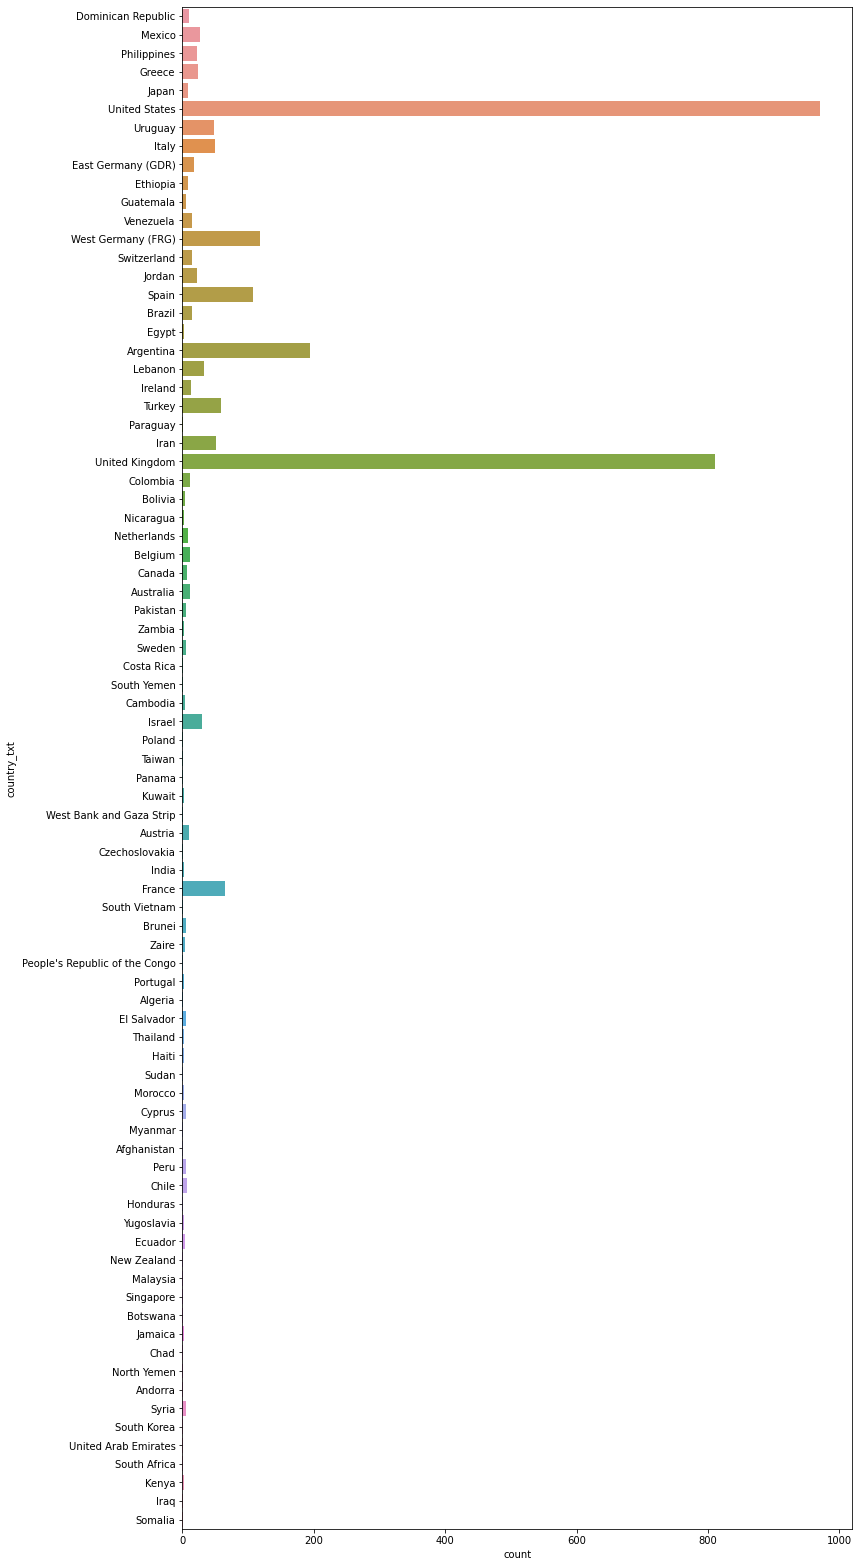

In [50]:
plt.figure(figsize = (12,28))
sns.countplot( y = data["country_txt"])
plt.show()

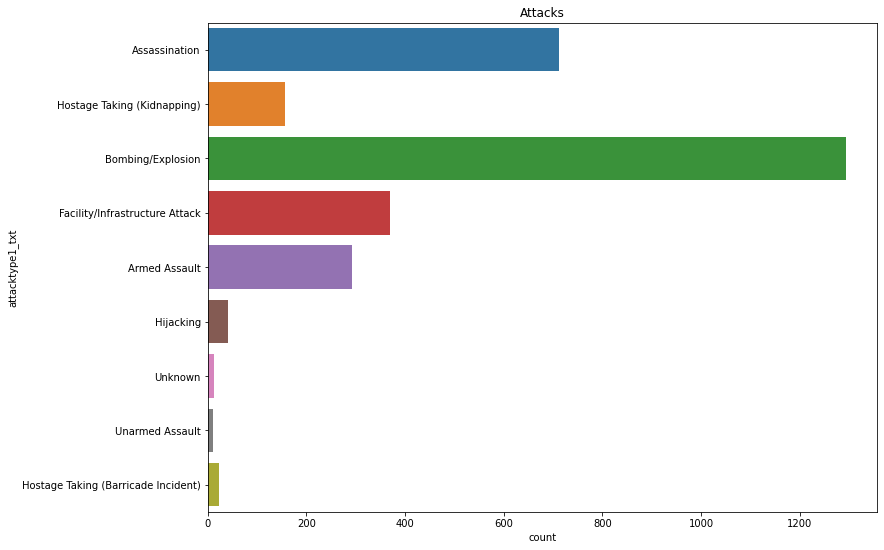

In [52]:
plt.figure(figsize = (12,9))
sns.countplot(y = 'attacktype1_txt', data = data)
plt.title('Attacks')
plt.show()

In [9]:
data.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999766,-0.041334,-0.004233,-0.001713,0.117312,0.367269,-0.004154,0.323438,0.004678,...,0.209482,NaN,0.193228,NaN,0.168462,-0.213825,0.254893,0.246720,0.245636,0.387993
iyear,0.999766,1.000000,-0.062903,-0.006332,-0.001883,0.115208,0.364933,-0.003970,0.321162,0.004842,...,0.205710,NaN,0.185691,NaN,0.165455,-0.213912,0.251870,0.243713,0.242621,0.383910
imonth,-0.041334,-0.062903,1.000000,0.070656,0.007375,0.088699,0.088642,-0.008822,0.088028,-0.009001,...,0.176769,NaN,0.309854,NaN,0.134117,0.012154,0.125614,0.125340,0.125750,0.168829
iday,-0.004233,-0.006332,0.070656,1.000000,0.012406,0.050678,-0.011084,-0.019924,-0.006608,0.008658,...,0.002365,NaN,0.078063,NaN,0.079504,-0.090077,0.064389,0.062931,0.037910,0.058803
extended,-0.001713,-0.001883,0.007375,0.012406,1.000000,-0.166557,0.005902,-0.202557,0.019724,0.099119,...,-0.119802,NaN,-0.206405,NaN,-0.356351,-0.002907,0.073713,0.090575,0.046757,0.076537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.213825,-0.213912,0.012154,-0.090077,-0.002907,0.117305,0.204430,0.276445,0.301621,-0.063805,...,0.037592,NaN,0.040501,NaN,-0.186459,1.000000,0.053205,0.063586,0.050943,0.005117
INT_LOG,0.254893,0.251870,0.125614,0.064389,0.073713,0.197770,0.276623,0.037426,0.217182,0.069672,...,0.002465,NaN,-0.055565,NaN,0.033493,0.053205,1.000000,0.994510,0.209788,0.686360
INT_IDEO,0.246720,0.243713,0.125340,0.062931,0.090575,0.166570,0.270619,0.014862,0.215789,0.075867,...,-0.004184,NaN,-0.037845,NaN,0.011683,0.063586,0.994510,1.000000,0.231295,0.689179
INT_MISC,0.245636,0.242621,0.125750,0.037910,0.046757,0.349166,0.475327,0.140390,0.436877,0.039299,...,-0.020928,NaN,0.031704,NaN,0.007399,0.050943,0.209788,0.231295,1.000000,0.535907


# Thank you